In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 64
TRAIN_DIR='./flowers/train'
TEST_DIR='./flowers/val'
# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Using TensorFlow backend.


Found 3241 images belonging to 5 classes.
Found 862 images belonging to 5 classes.


In [2]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout


CLASSES = 5
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
len(base_model.layers)

311

In [10]:
#base_model.layers.pop()

In [3]:


x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
import keras
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
Adam=keras.optimizers.Adam(lr=0.0001)
      
model.compile(optimizer=Adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
EPOCHS = 50
BATCH_SIZE = 64
STEPS_PER_EPOCH = 50
VALIDATION_STEPS = 13
History = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
50/50 [==============================] - 51s 1s/step - loss: 1.5675 - acc: 0.3053 - val_loss: 1.4474 - val_acc: 0.3798
Epoch 2/50
50/50 [==============================] - 44s 881ms/step - loss: 1.3466 - acc: 0.5094 - val_loss: 1.3187 - val_acc: 0.4411
Epoch 3/50
50/50 [==============================] - 40s 808ms/step - loss: 1.1861 - acc: 0.6315 - val_loss: 1.2285 - val_acc: 0.4825
Epoch 4/50
50/50 [==============================] - 40s 798ms/step - loss: 1.0566 - acc: 0.7092 - val_loss: 1.2186 - val_acc: 0.4875
Epoch 5/50
50/50 [==============================] - 40s 807ms/step - loss: 0.9521 - acc: 0.7470 - val_loss: 1.1057 - val_acc: 0.5376
Epoch 6/50
50/50 [==============================] - 40s 807ms/step - loss: 0.8868 - acc: 0.7675 - val_loss: 1.1488 - val_acc: 0.4975
Epoch 7/50
50/50 [==============================] - 41s 824ms/step - loss: 0.8210 - acc: 0.7868 - val_loss: 1.0611 - val_acc: 0.5388
Epoch 8/50
50/50 [======

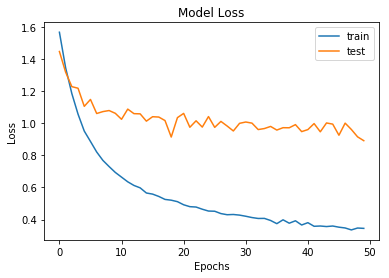

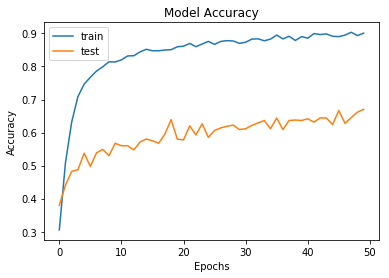

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def plot_history(History):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(History.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(History.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

NameError: name 'history' is not defined